In [1]:
!uv add -qU langgraph langchain langchain-openai

In [2]:
!uv add -q python-dotenv

In [3]:
from dotenv import load_dotenv

load_dotenv()

True

### Checkpointer

### Model 정의

In [4]:
from langchain.chat_models import init_chat_model

model = init_chat_model("gpt-5-nano")

### State 정의

In [5]:
from langchain.messages import AnyMessage
from typing_extensions import TypedDict, Annotated
from langgraph.graph.message import add_messages

class ChatState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

### Node 정의

In [13]:
def chatbot_node(state: ChatState):
    return {"messages": [model.invoke(state["messages"])]}

### 그래프 생성

In [14]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(ChatState)

workflow.add_node("chatbot", chatbot_node)

workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot", END)

In [15]:
# InMemortSaver 객체 import
from langgraph.checkpoint.memory import InMemorySaver

memory = InMemorySaver()

In [16]:
app = workflow.compile(checkpointer= memory)

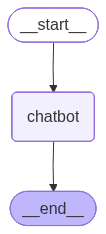

In [17]:
app

### 실행

In [18]:
config_1 = {"configurable": {'thread_id' : '1'}}

In [19]:
from langchain.messages import HumanMessage

input_msg1 = {"messages": [HumanMessage(content="안녕? 내 이름은 Keemba야.")]}
response1 = app.invoke(input_msg1, config = config_1)

In [20]:
response1

{'messages': [HumanMessage(content='안녕? 내 이름은 Keemba야.', additional_kwargs={}, response_metadata={}, id='4688ffcf-e873-4e8d-a15d-aa556f9033c8'),
  AIMessage(content='안녕, Keemba! 반가워요. 이름 멋지네요. 무엇을 도와드릴까요? 한국어로 계속할지, 영어로 할지 편하게 말씀해 주세요. 궁금한 점이나 도움이 필요하신 게 있으면 편하게 말해 주세요. 오늘 어떤 주제로 이야기해 볼까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 654, 'prompt_tokens': 16, 'total_tokens': 670, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 576, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-DCPyJ3OPsfA2sw5hQabxLOS3RbCWq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c8a9e-1843-71c2-88e7-db39d1309c87-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 16, 'output_tokens': 6

In [21]:
response1['messages'][-1].content

'안녕, Keemba! 반가워요. 이름 멋지네요. 무엇을 도와드릴까요? 한국어로 계속할지, 영어로 할지 편하게 말씀해 주세요. 궁금한 점이나 도움이 필요하신 게 있으면 편하게 말해 주세요. 오늘 어떤 주제로 이야기해 볼까요?'

In [24]:
input_msg2 = {"messages": [HumanMessage(content="내 이름이 뭐라고?")]}
response2 = app.invoke(input_msg2, config = config_1)

In [25]:
response2

{'messages': [HumanMessage(content='안녕? 내 이름은 Keemba야.', additional_kwargs={}, response_metadata={}, id='4688ffcf-e873-4e8d-a15d-aa556f9033c8'),
  AIMessage(content='안녕, Keemba! 반가워요. 이름 멋지네요. 무엇을 도와드릴까요? 한국어로 계속할지, 영어로 할지 편하게 말씀해 주세요. 궁금한 점이나 도움이 필요하신 게 있으면 편하게 말해 주세요. 오늘 어떤 주제로 이야기해 볼까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 654, 'prompt_tokens': 16, 'total_tokens': 670, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 576, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-DCPyJ3OPsfA2sw5hQabxLOS3RbCWq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c8a9e-1843-71c2-88e7-db39d1309c87-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 16, 'output_tokens': 6

In [26]:
response2['messages'][-1].content

'당신의 이름은 Keemba예요. 필요하신 게 있으면 말씀해 주세요. 오늘 어떤 주제로 이야기해 볼까요?'

In [27]:
config_2 = {"configurable": {"thread_id": "2"}}

In [30]:
input_msg3 = {"messages": [HumanMessage(content="내 이름이 뭐라고?")]}
response3 = app.invoke(input_msg3, config=config_2)

In [32]:
response3['messages'][-1].content

'다시 한 번 말하지만, 제게 당신의 이름은 아직 없어요. 이름을 알려주시면 그 이름으로 불러드릴게요. 원하시면 닉네임이나 애칭도 제가 임의로 지어 드릴 수 있어요. 어떻게 불러드릴까요?'

## State History

### get_state

In [34]:
current_state = app.get_state(config_1)

In [35]:
current_state

StateSnapshot(values={'messages': [HumanMessage(content='안녕? 내 이름은 Keemba야.', additional_kwargs={}, response_metadata={}, id='4688ffcf-e873-4e8d-a15d-aa556f9033c8'), AIMessage(content='안녕, Keemba! 반가워요. 이름 멋지네요. 무엇을 도와드릴까요? 한국어로 계속할지, 영어로 할지 편하게 말씀해 주세요. 궁금한 점이나 도움이 필요하신 게 있으면 편하게 말해 주세요. 오늘 어떤 주제로 이야기해 볼까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 654, 'prompt_tokens': 16, 'total_tokens': 670, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 576, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-DCPyJ3OPsfA2sw5hQabxLOS3RbCWq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c8a9e-1843-71c2-88e7-db39d1309c87-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 16,

In [36]:
#현재 스탭
current_state.values['messages'][-1].content

'당신의 이름은 Keemba예요. 필요하신 게 있으면 말씀해 주세요. 오늘 어떤 주제로 이야기해 볼까요?'

In [37]:
# 다음 실행할 노드
current_state.next

()

In [38]:
current_state.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f110b92-ba37-6220-8004-765591e3d444'}}

### get_state_history

In [39]:
history = list(app.get_state_history(config_1))

In [40]:
history

[StateSnapshot(values={'messages': [HumanMessage(content='안녕? 내 이름은 Keemba야.', additional_kwargs={}, response_metadata={}, id='4688ffcf-e873-4e8d-a15d-aa556f9033c8'), AIMessage(content='안녕, Keemba! 반가워요. 이름 멋지네요. 무엇을 도와드릴까요? 한국어로 계속할지, 영어로 할지 편하게 말씀해 주세요. 궁금한 점이나 도움이 필요하신 게 있으면 편하게 말해 주세요. 오늘 어떤 주제로 이야기해 볼까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 654, 'prompt_tokens': 16, 'total_tokens': 670, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 576, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-DCPyJ3OPsfA2sw5hQabxLOS3RbCWq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c8a9e-1843-71c2-88e7-db39d1309c87-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 16

In [41]:
history[1]

StateSnapshot(values={'messages': [HumanMessage(content='안녕? 내 이름은 Keemba야.', additional_kwargs={}, response_metadata={}, id='4688ffcf-e873-4e8d-a15d-aa556f9033c8'), AIMessage(content='안녕, Keemba! 반가워요. 이름 멋지네요. 무엇을 도와드릴까요? 한국어로 계속할지, 영어로 할지 편하게 말씀해 주세요. 궁금한 점이나 도움이 필요하신 게 있으면 편하게 말해 주세요. 오늘 어떤 주제로 이야기해 볼까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 654, 'prompt_tokens': 16, 'total_tokens': 670, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 576, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-DCPyJ3OPsfA2sw5hQabxLOS3RbCWq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c8a9e-1843-71c2-88e7-db39d1309c87-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 16,

In [42]:
for i, snapshot in enumerate(history):
    print(f"\n[Snapshot {i}]")
    print(f" - Created At: {snapshot.created_at}") # 생성 시간

    # 해당 시점의 대화 내용
    msgs = snapshot.values.get("messages", [])
    if msgs:
        last_msg = msgs[-1]
        sender = "AI" if last_msg.type == "ai" else "User"
        print(f" - 마지막 대화: [{sender}] {last_msg.content}")
    else:
        print(" - (대화 시작 전 초기 상태)")
    
    print(f" - Next: {snapshot.next}") # 다음 행선지 단계 정보
    print(f" - Metadata: {snapshot.metadata}") #단계 정보 (step, source 등)


[Snapshot 0]
 - Created At: 2026-02-23T13:11:31.232173+00:00
 - 마지막 대화: [AI] 당신의 이름은 Keemba예요. 필요하신 게 있으면 말씀해 주세요. 오늘 어떤 주제로 이야기해 볼까요?
 - Next: ()
 - Metadata: {'source': 'loop', 'step': 4, 'parents': {}}

[Snapshot 1]
 - Created At: 2026-02-23T13:11:23.437588+00:00
 - 마지막 대화: [User] 내 이름이 뭐라고?
 - Next: ('chatbot',)
 - Metadata: {'source': 'loop', 'step': 3, 'parents': {}}

[Snapshot 2]
 - Created At: 2026-02-23T13:11:23.436325+00:00
 - 마지막 대화: [AI] 안녕, Keemba! 반가워요. 이름 멋지네요. 무엇을 도와드릴까요? 한국어로 계속할지, 영어로 할지 편하게 말씀해 주세요. 궁금한 점이나 도움이 필요하신 게 있으면 편하게 말해 주세요. 오늘 어떤 주제로 이야기해 볼까요?
 - Next: ('__start__',)
 - Metadata: {'source': 'input', 'step': 2, 'parents': {}}

[Snapshot 3]
 - Created At: 2026-02-23T13:09:10.145162+00:00
 - 마지막 대화: [AI] 안녕, Keemba! 반가워요. 이름 멋지네요. 무엇을 도와드릴까요? 한국어로 계속할지, 영어로 할지 편하게 말씀해 주세요. 궁금한 점이나 도움이 필요하신 게 있으면 편하게 말해 주세요. 오늘 어떤 주제로 이야기해 볼까요?
 - Next: ()
 - Metadata: {'source': 'loop', 'step': 1, 'parents': {}}

[Snapshot 4]
 - Created At: 2026-02-23T13:09:02.657930+00:00
 -